In [1]:
import numpy as np
np.set_printoptions(precision=4)

Initializing camera:

In [2]:
%run capture_picture.py

Saved test.jpg (Size: 720 x 1280)


In [3]:
import pyavfcam

# Open the default video source
cam = pyavfcam.AVFCam(sinks='image')
cam.snap_picture('test.jpg')

print( "Saved test.jpg (Size: " + str(cam.shape[0]) + " x " + str(cam.shape[1]) + ")")


Saved test.jpg (Size: 720 x 1280)


In [4]:
import pyavfcam
# Open the default video source
cam = pyavfcam.AVFCam(sinks='image')
print( "Size: " + str(cam.shape[0]) + " x " + str(cam.shape[1]) )

Size: 720 x 1280


In [5]:
cam

AVFCam(['image'], shape=(720, 1280))

Snap a picture:

In [6]:
frame = np.asarray(cam.snap_picture())
print('frame as size', frame.shape)

frame as size (720, 1280)


Accessing a pixel:

In [7]:
frame[0, 0]

(28, 40, 59, 255)

Accessing a line:

In [8]:
frame[0, :]

array([(28,  40,  59, 255), (35,  47,  66, 255), (32,  42,  66, 255), ...,
       (83, 125, 255, 255), (77, 108, 255, 255), (74, 105, 255, 255)],
      dtype=[('f0', 'u1'), ('f1', 'u1'), ('f2', 'u1'), ('f3', 'u1')])

In [9]:
dtype = [('f0', np.uint8), ('f1', np.uint8), ('f2', np.uint8), ('f3', np.uint8)]
frame[:, 0].view(dtype=dtype)

array([(28, 40, 59, 255), (26, 37, 57, 255), (24, 35, 55, 255),
       (37, 45, 62, 255), (43, 48, 64, 255), (40, 50, 65, 255),
       (39, 48, 67, 255), (41, 47, 69, 255), (35, 41, 65, 255),
       (33, 34, 59, 255), (36, 37, 60, 255), (30, 40, 57, 255),
       (22, 46, 62, 255), (18, 50, 61, 255), (14, 51, 61, 255),
       (10, 39, 50, 255), (23, 43, 55, 255), (34, 45, 57, 255),
       (39, 42, 58, 255), (38, 43, 61, 255), (35, 41, 65, 255),
       (30, 39, 63, 255), (20, 38, 57, 255), (16, 45, 67, 255),
       (10, 42, 64, 255), ( 6, 43, 62, 255), ( 6, 44, 59, 255),
       (12, 41, 56, 255), (20, 41, 57, 255), (29, 45, 64, 255),
       (30, 44, 63, 255), (31, 45, 64, 255), (20, 35, 52, 255),
       (17, 37, 51, 255), ( 7, 35, 44, 255), (17, 43, 47, 255),
       (20, 47, 49, 255), (16, 40, 47, 255), (21, 39, 49, 255),
       (26, 39, 52, 255), (33, 44, 56, 255), (34, 42, 55, 255),
       (50, 42, 54, 255), (53, 46, 56, 255), (46, 39, 49, 255),
       (27, 34, 42, 255), (13, 36, 43, 2

getting prepared for reshaping:

In [10]:
frame[0, :].shape[0] * 4, frame[0, :].view(dtype=dtype).view(dtype=np.uint8).shape

(5120, (5120,))

In [11]:
frame.ravel().shape[0] * 4, frame.ravel().view(dtype=dtype).view(dtype=np.uint8).shape

(3686400, (3686400,))

In [12]:
frame_np = frame.view(dtype=dtype).view(dtype=np.uint8) # convert to UINT8
frame_np = frame_np.reshape((cam.shape[0], cam.shape[1], 4)) # de-raveling
frame_np = frame_np[:, :, :3] # removing alpha
frame_np = frame_np[:, :, ::-1] # BGR > RGB
print('frame_np as size', frame_np.shape)
print ('Min, max=', frame_np.min(), frame_np.max())

frame_np as size (720, 1280, 3)
Min, max= 0 255


and finally displaying it

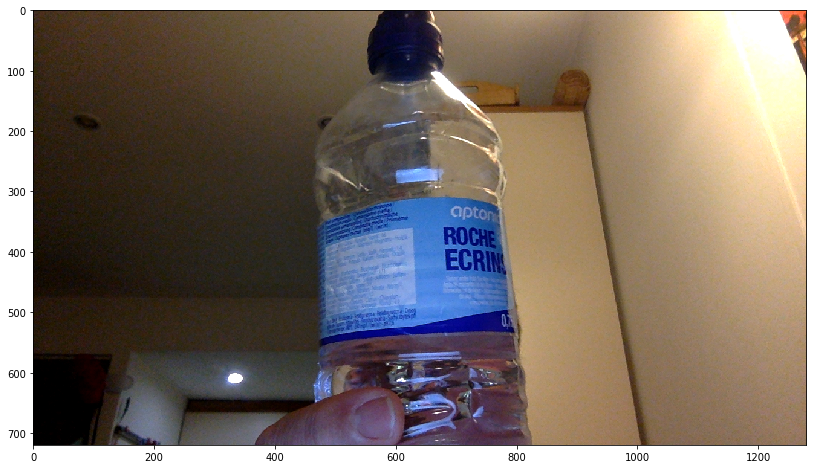

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,8))
ax.imshow(frame_np/255.)

In [14]:
def grab(cam):
    frame = np.asarray(cam.snap_picture())
    dtype = [('f0', np.uint8), ('f1', np.uint8), ('f2', np.uint8), ('f3', np.uint8)]
    frame_np = frame.view(dtype=dtype).view(dtype=np.uint8) # convert to UINT8
    frame_np = frame_np.reshape((cam.shape[0], cam.shape[1], 4)) # de-raveling
    frame_np = frame_np[:, :, :3] # removing alpha
    frame_np = frame_np[:, :, ::-1] # BGR > RGB
    return frame_np

print('frame as size', grab(cam).shape)

frame as size (720, 1280, 3)


In [15]:
%timeit grab(cam)

53.1 ms ± 312 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
import time
t0 = time.time()
N = 32
for i in range(N):
    _ = grab(cam)
t1 = time.time()
print('Executed = {:d} grabs'.format(N),
                  'in {:.1f} seconds'.format(t1-t0),
                  ' ({:.1f} fps)'.format(N/(t1-t0)))    

Executed = 32 grabs in 1.8 seconds  (18.2 fps)


In [17]:
cam.stop_recording()

ValueError: file video sink not initialized

In [ ]:
%load_ext version_information
%version_information numpy, pyavfcam, matplotlib